In [1]:
import numpy as np
import pandas as pd

Code for graphing functions

In [3]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def kneeTest(pred, labels, entropy, num_outputs, classes, output_names=[]):
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     print(transpose_entropy)
#     for branch in branches:
#          for class in classes:
#                 for entropy in entropies:
#                     classAccuracy = sum of truth labels /count of truth labels where entropies <= entropy 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
#             print("class {}".format(labelClass),end="\r")
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy"])
            df = df.sort_values(by=["entropy"])
#             print(df)
            axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
            axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])

        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
        
        # Set common labels
    fig.text(0.5, 0.01, 'Confidence Score', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

In [4]:
# This is the best entropy accuracy for each class,
# now to determine when to trust or pass, what entropy has the best acc for answered items?
# of all items seen at this entropy value, what is the accuracy score?
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """    
#     print("number of classes {}".format(len(classes)))
#     print("correct answers {}".format(results.sum()))
    classAcc = {}
    correct =[]
    count = []
    percentage = []
    if len(classes) > 0:
        for i, labelClass in enumerate(classes):            
            correct.append(results[np.where(labels==labelClass)].sum())
            count.append(len(labels[np.where(labels == labelClass)]))
#             try:
            p = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
#             except expression as identifier:
#                 p = 0 
            percentage.append(p)
            classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    else: 
        correct.append(results.sum())
        count.append((len(labels)))
        p = results.sum()/len(labels)
        percentage.append(p)
        classAcc["all"] = p
    avgAcc = results.sum()/len(labels)
    print("correct {}".format(correct))
    print("count {}".format(count))
    print("percentage {}".format(percentage))

    return avgAcc, classAcc

def findMainExitAccuracies(pred, labels, num_outputs, labelClasses=[], output_names=[],graph=False):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        labels = np.array(labels)
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
            fig, ax = plt.subplots()
            ticks = []

        df =  pd.DataFrame() 
        print("correct answers {}".format(transpose_results[0].sum()))
        print("passed results {}".format(len(transpose_results[0])))
        avgAcc, classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
        if graph==True:
            for i, x in enumerate(classAcc):
                ticks.append(x)
#                 print(x)                
                plt.bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if classAcc[x] != 0:
                    if type(x) != str:
                        plt.text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                    else: 
                        plt.text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, avgAcc, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                plt.hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Accuracy", linestyles="dashed", alpha=0.5)
                plt.text(len(classAcc.keys())-.5, .74, ' Avg Acc%', ha='left', va='center')
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.xticks(ticks)
            plt.title("Class Label Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc


def findConfidencePoint(pred, labels, entropy, num_outputs, classes, output_names=[]):
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
#             print("class {}".format(labelClass),end="\r")
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            df = df.sort_values(by=["count"])
#             print(df["accuracy"].size)
            #find max of count where accuracy >= mainbranch acc
            
            axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
            axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])

        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
    
    # Set common labels
    fig.text(0.5, 0.01, 'Branch Ouput Count', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def find_nearest(array, value):
    """returns the index of the element of array that is closest to value
        Nan is treated as 0 for the purpose of finding closest value.
    """
    if isinstance(array, pd.Series):
        indexes = find_neighbours(value,array)
        return indexes
    else:
        array = np.asarray(array)
        idx = np.nanargmin(np.abs(array - value))    
    print("nearest value to {} is {} at {}".format(value, array[idx], idx))
    return idx

def find_neighbours(df, value, colname=""):
    """ find the closest matches to a value in a dataframe, if there are multiple matches, use the match that has the highest 
        count value, aka the most number of counts.
    """
#     print(df.sort_values(by=colname))
    if isinstance(df, pd.DataFrame):
        if (df[colname].notna().sum()) <= 0:
            # no valid values were found, return 0 
            print("no Valid values were found for df")
            return None
        exactmatch = df[df[colname] == value]
        if not exactmatch.empty:
            return exactmatch["count"].argmax()
        else:
            try:            
                lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
            except ValueError:
                lowerneighbour_ind = 0
            try:
                upperneighbour_ind = df[df[colname] > value][colname].idxmin()
            except ValueError:
                upperneighbour_ind = 0
                
#             print("lowerneighbour_ind {}".format(lowerneighbour_ind))
#             print("upperneighbour_ind {}".format(upperneighbour_ind))
            
            neighbours = df.iloc[[lowerneighbour_ind,upperneighbour_ind]]
#             print(neighbours)
#             print(neighbours["count"].idxmax())

#             neighbours = neighbours["accuracy"].sub(value).abs().idxmin()
#             print(neighbours)
            return neighbours["count"].idxmax()
    else:
        print("input is not a Dataframe, {}".format(type(df)))
        return None
    
    
        

    
def findThreshold(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,avgAcc=False,graph=False):
    """    Find and Mark the threshold points for each class.
        mainbranchNum: the position in the pred array of the main exit, defaults to the first exit.
    """    
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
    mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
    print("accuracy Value: {}".format(mainAcc))

    if avgAcc:
        mainAcc = [sum(mainAcc.values())/float(len(mainAcc.values()))]
        mainAcc = np.repeat(mainAcc,len(classes))
        
    print("accuracy Value: {}".format(mainAcc))
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    for i, branchEntropy in enumerate(transpose_entropy):
#         print("branch {}".format(i))
        classEntropy = {}
        thresholdPoints[output_names[i]] = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
            for k, entropy in enumerate(branchEntropy):
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            threshold_idx = find_neighbours(df[["accuracy","count"]],mainAcc[labelClass],"accuracy")
            if threshold_idx == None:
                thresholdPoints[output_names[i]][labelClass] = {"accuracy":0,"count":0,"entropy":0}
            else:
#                 print(output_names[i])
#                 print(labelClass)
#                 print(threshold_idx)
#                 print(df.iloc[threshold_idx][["accuracy","count","entropy"]])
                thresholdPoints[output_names[i]][labelClass] = df.iloc[threshold_idx][["accuracy","count","entropy"]].to_dict()
#             maxRowidx = df["count"].idxmax()
            print("nearest value to {} is {} at {} with {} counts ".format(mainAcc[labelClass],df["accuracy"][threshold_idx],threshold_idx, df["count"][threshold_idx]))
#             print("The max count value is {} with {} counts".format(float(df.iloc[maxRowidx]["accuracy"]), int(df.iloc[maxRowidx]["count"])))
            if graph:
                axs[round(int(i/2)), round(i%2)].plot(thresholdPoints[output_names[i]][labelClass]["count"],thresholdPoints[output_names[i]][labelClass]["accuracy"],marker='v', markersize=5, color=colors[j])
                df = df.sort_values(by=["count"])
                axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass), color=colors[j], alpha=0.8)        

                axs[round(int(i/2)), round(i%2)].plot()

                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
        if graph:
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    if graph:
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
#     df.to_csv("graph_output.csv")
    return thresholdPoints

def predict(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,avgAcc=False,graph=False):
    """ simulate performing inference on the test set, using a calculated set of thresholds.
    """
    maxE = True # should I use all throughput.
    mainBranch = 0 #which exit in the results is the main branch and to be skipped?
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    #get the main branch accuracy values
    average, mAcc = exitAccuracy(transpose_results[0],transpose_labels[0], labelClasses)
    #determine the class thresholds for the branches that are closest to the main branch accuracy values
    
    thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], output_names,avgAcc= avgAcc)
    for i in thresholdpoints:
        thresh = pd.DataFrame.from_dict(thresholdpoints[i],orient='index')
#         print(i)

#         print(thresh)
    def classResult(classes):
        classes = classes
        results={}
        for i in range(classes):
            results[i]= {"correct":0,"total":0,"passed":0}
        return results
    BR={}
    for i in output_names:
        BR[i]=classResult(len(classes))
    
    #iterate through results to see which predictions meet threshold requirements.
    for i, prediction in enumerate(pred):
#         print(prediction)
        for j, bResult in enumerate(prediction):
#             if j == mainBranch: ###skip the first branch as it is the main 
#                 continue
            if maxE == False:    
#                 if entropy[i][j] <= thresholdpoints[output_names[j]][bResult]["entropy"]:
#                 print("pred {}(l:{}) at branch {} is accepted, {} <={}".format(bResult,labels[i][j],j,entropy[i][j],thresholdpoints[output_names[j]][bResult]["entropy"]))
#                 print(BR[output_names[j]][labels[i][j]])
                if bResult == labels[i][j]:
                    BR[output_names[j]][labels[i][j]]["correct"] += 1 
                BR[output_names[j]][labels[i][j]]["total"] += 1 
            else:
                BR[output_names[j]][labels[i][j]]["passed"] += 1 
    print(BR)
    return BR


Smaller Test Set

In [8]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)
# y = kneeTest(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

Larger Test Set

In [9]:
import csv
plt.rcParams["figure.figsize"] = (10,10)
with open('results/predClasses_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    pred = list(reader)
with open('results/labels_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    labels = list(reader)
with open('results/predEntropy_alt8_1.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    entropy = list(reader)


Knee Test

branch 0
branch 1


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

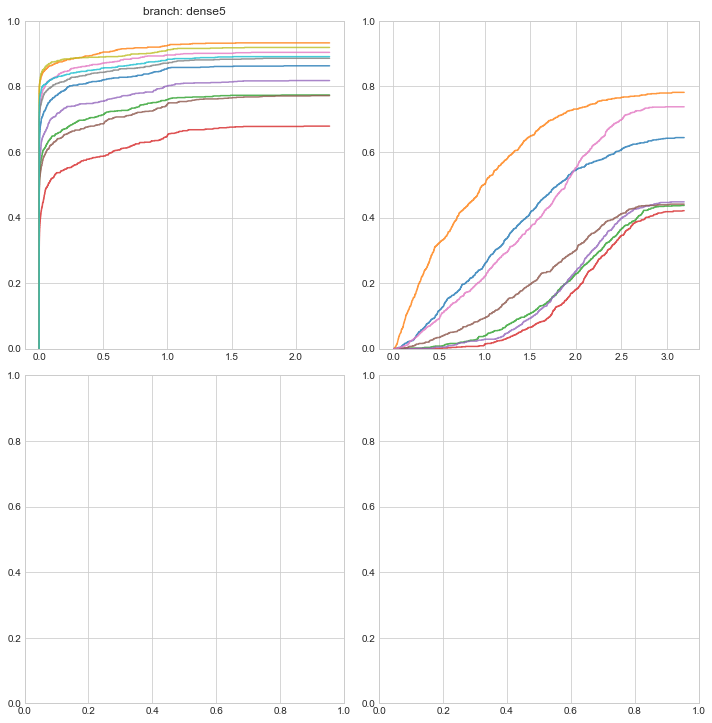

In [9]:
y = kneeTest(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])


Find Confidence Point for branches

In [ ]:
y = findConfidencePoint(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])

Run the Prediction

In [168]:
y = predict(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","Branch 1","Branch 2","Branch 3"],avgAcc=True,graph=False)

print("Threshold Points:")
print(y)

correct [863, 933, 774, 679, 818, 772, 904, 886, 919, 891]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.863, 0.933, 0.774, 0.679, 0.818, 0.772, 0.904, 0.886, 0.919, 0.891]
correct answers 8439
passed results 10000
correct [863, 933, 774, 679, 818, 772, 904, 886, 919, 891]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.863, 0.933, 0.774, 0.679, 0.818, 0.772, 0.904, 0.886, 0.919, 0.891]
accuracy Value: {0: 0.863, 1: 0.933, 2: 0.774, 3: 0.679, 4: 0.818, 5: 0.772, 6: 0.904, 7: 0.886, 8: 0.919, 9: 0.891}
accuracy Value: [0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439]


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.863 at 87 with 1000 counts 
nearest value to 0.8439 is 0.933 at 25 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8437869822485207 at 1863 with 845 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84375 at 69 with 512 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.843322818086225 at 3459 with 951 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.844059405940594 at 6178 with 808 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.904 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.886 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.918918918918919 at 735 with 999 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.891 at 25 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8441558441558441 at 6294 with 385 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8436018957345972 at 467 with 844 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8 at 92 with 5 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.514018691588785 at 0 with 107 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8333333333333334 at 107 with 6 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84251968503937 at 89 with 127 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8433048433048433 at 199 with 702 counts 
nearest value to 0.8439 is 0.8431952662721893 at 191 with 676 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439620081411127 at 1762 with 737 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8431818181818181 at 3792 with 440 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8438880706921944 at 714 with 679 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.848 at 526 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84 at 1130 with 75 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84375 at 152 with 64 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8440366972477065 at 113 with 109 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8412698412698413 at 258 with 252 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.849 at 2671 with 1000 counts 
nearest value to 0.8439 is 0.8436724565756824 at 1626 with 806 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8431163287086446 at 153 with 937 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439241917502787 at 3497 with 897 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.856 at 2868 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.895 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8432642487046632 at 1887 with 772 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8438356164383561 at 611 with 365 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.843680709534368 at 2186 with 902 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439620081411127 at 640 with 737 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8748748748748749 at 459 with 999 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.854 at 2868 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.898 at 2868 with 1000 counts 
nearest value to 0.8439 is 0.886 at 3496 with 1000 counts 
{'Main Exit': {0: {'correct': 0, 'total': 0, 'passed': 1000}, 1: {'correct': 0, 'total': 0, 'passed': 1000}, 2: {'correct': 0, 'total': 0, 'passed': 1000}, 3: {'correct': 0, 'total': 0, 'passed': 1000}, 4: {'correct': 0, 'total': 0, 'passed': 1000}, 5: {'correct': 0, 'total': 0, 'passed': 1000}, 6: {'correct': 0, 'total': 0, 'passed': 1000}, 7: {'correct': 0, 'total': 0, 'passed': 1000}, 8: {'correct': 0, 'total': 0, 'passed': 1000}, 9: {'correct': 0, 'total': 0, 'passed': 1000}}, 'Branch 1': {0: {'correct': 0, 'total': 0, 'passed': 1000}, 1: {'correct': 0, 'total': 0, 'passed': 1000}, 2: {'correct': 0, 'total': 0, 'passed': 1000}, 3: {'correct': 0, 'total': 0, 'passed': 1000}, 4: {'correct': 0, 'total': 0, 'passed': 1000}, 5: {'correct': 0, 'total': 0, 'passed': 1000}, 6: {'correct': 0, 'total': 0, 'passed': 1000}, 7: {'correct': 0, 'total': 0, 'passed': 1000}, 8: {'co

In [ ]:
# Main exit Average Accuracy
y = findMainExitAccuracies(pred, labels, 4,[], ["dense5","pooling_3","pooling_4","dense_3"])


In [ ]:
# Main exit Class Accuracy
y = findMainExitAccuracies(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"],True)

Find the Average Confidence score

In [10]:
def avgConfidence(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,avgAcc=False,graph=False):
    #find the average confidence score of all predictions, output this alongside the accuracy
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
#     mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
#     print("accuracy Value: {}".format(mainAcc))

#     if avgAcc:
#         mainAcc = [sum(mainAcc.values())/float(len(mainAcc.values()))]
#         mainAcc = np.repeat(mainAcc,len(classes))
        
#     print("accuracy Value: {}".format(mainAcc))
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
#         print(branchEntropy)
        maxE = branchEntropy.max()
        print(maxE)
        avgE = branchEntropy.sum()/len(branchEntropy)
        print("avg entropy {}".format(avgE))
#         print("{}%".format(transpose_results[i].sum()/len(transpose_results[i])*100))
        
        print("avgAcc {:.2f}%".format(transpose_results[i].sum()/len(transpose_results[i])*100))
        print("avgAcc at avgE {:.2f}% for a count of {} inputs".format(transpose_results[i][np.where((branchEntropy <= avgE))].sum()/
                                         len(transpose_labels[i][np.where((branchEntropy <= avgE))])*100, len(transpose_labels[i][np.where((branchEntropy <= avgE))])))
#         print(transpose_results[i][np.where((transpose_labels[i] == labelClass))].sum())
        #sum the accuracy
        count =[]
        value = []
        acc = []
        accepted=[]
        import math
        for j in range(35):
            j_ = j*.1
            count.append(j_)
            if math.isnan(transpose_results[i][np.where((branchEntropy <= j_))].sum()/len(transpose_labels[i][np.where((branchEntropy <= j_))])):
                acc.append(0)
            else:
                acc.append(transpose_results[i][np.where((branchEntropy <= j_))].sum()/len(transpose_labels[i][np.where((branchEntropy <= j_))]))
            accepted.append(len(transpose_labels[i][np.where((branchEntropy <= j_))]))
            
            """ The cumculative performance of a branch
                The inputs recieved by the branch where the entropy of score of the previous branch is greater than the entropy 
                threshold of the previous branch(s) 
            """
            
            
            
#         print(count)
#         print(acc[10])
        print(accepted)
#         accepted = (np.array(accepted) / np.array(accepted).sum()) / np.array(accepted).max()
        s = sum(accepted)
        print("sum: {}".format(s))
#         norm = [float(k)/s for k in accepted]
        norm = [k/10000 for k in accepted]
        axs[round(int(i/2)), round(i%2)].plot(count,acc,label="accuracy")        
        axs[round(int(i/2)), round(i%2)].plot(count,norm,label="output")        
#         axs[round(int(i/2)), round(i%2)].plot(count,acc,marker='v', markersize=5)

        axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
        #sum the entropy
        
#        
    if graph:
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, -0.001, 'Prediction Entropy', ha='center', va='center')
        fig.text(-0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
        fig.legend(lines, labels,bbox_to_anchor=(.5, 1.05), loc=2,borderaxespad=0.,frameon=True)
# #     df.to_csv("graph_output.csv")
    return True

In [11]:
print(np.transpose(pred))

[[3. 8. 8. ... 5. 1. 7.]
 [3. 8. 0. ... 5. 1. 7.]
 [3. 1. 0. ... 5. 1. 7.]
 [3. 8. 8. ... 5. 1. 7.]]


In [88]:

    
def findThreshold_new(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0, sequential = False, avgAcc=False,graph=False):
    """    Find and Mark the threshold points for each class.
        mainbranchNum: the position in the pred array of the main exit, defaults to the first exit.
        sequential: treat branches individually or sequentially. If True, all inputs are processed by all branches. If False, inputs are processed sequentially, with only those rejected by the previous branch supplied to the next.
    """    
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
    mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
    
    # try setting the mainAcc to equal to avg or better
    mainAvgAcc = sum(mainAcc.values())/float(len(mainAcc.values()))
    for i, score in enumerate(mainAcc.values()):
        print("{}, {} : {}".format(i, score,mainAvgAcc ))
        if score < mainAvgAcc:
            mainAcc[i] = mainAvgAcc
        mainAcc[i] = 1

            
    if avgAcc:
        mainAcc = [sum(mainAcc.values())/float(len(mainAcc.values()))]
        mainAcc = np.repeat(mainAcc,len(classes))
        
    print("accuracy Value: {}".format(mainAcc))
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    passedInputs = {}
    AcceptedResults =[]
    
    passedInputsIndex = False
    #reorder the branches so that the main branch is at the end
    
    compiledInputs = pd.DataFrame(entropy)
    compiledInputs = compiledInputs.add_prefix('entropy_')
    print(pd.DataFrame(compiledInputs))
    compiledInputs = compiledInputs.join(pd.DataFrame(results).add_prefix('results_'))
    compiledInputs.to_csv("results/compiledInputs{}.csv".format("_testing2"), sep=',', mode='w',index=True)
    print("done")
    for i, branchEntropy in enumerate(transpose_entropy):
#         continue
        if i == mainBranchNum:
            #skip and do at the end.
            print('skipping Main Branch until end.')
            continue
        classEntropy = {}
        thresholdPoints[output_names[i]] = {}
        df = pd.DataFrame()
        df['Entropy'] = branchEntropy
        df['Result'] = transpose_results[i]
        df['Label'] = transpose_labels[i]
#         print(df.groupby('Result').count())
#         print(df['Result'][df['Entropy']> 1].sum())
#         print(df['Result'][df['Entropy']> 1].count())
        df['avgAcc']=0
#         print(type(passedInputsIndex))
        if isinstance(passedInputsIndex, pd.core.indexes.numeric.Int64Index):
#             print("TRUE")
            df = df.iloc[passedInputsIndex]
#         print(df)
#         print(len(df['Entropy'].unique()))
        # reset passedInputsIndex 
        passedInputsIndex = False
        print("recieved inputs at {}: {}".format(output_names[i],len(df)))
        # there are too many items in the dataset to give them all a sum of their accuracy. this is an N(squared) problem this way
        # instead, I could 
        branchThresholds={}
        branchAccCount = 0
        for j, labelClass in enumerate(labelClasses):
#             if j is not 3:
#                 continue
#             print("class Object ",labelClass)
            classEntropy[labelClass] = []
            prev = 0
            count = 0
            
            df_objects = pd.DataFrame(df.loc[df['Label']==labelClass])
        
            df2 = pd.DataFrame()
            for k, row in df_objects.sort_values(by='Entropy').iterrows():
                count = count+1
                print("Object Class {}, Count: {}".format(labelClass, count),end="\r")
    #             print(prev, int(row['Result']),count)
                row['count'] = count
                acceptedCount = (prev + int(row['Result']))
    #             row['true'] = acceptedCount
                row['avgAcc'] = acceptedCount / count
                
                prev = acceptedCount
                df2 = df2.append(row,ignore_index=True)
#                 print(df2)
  
#             print(df2)
#             print(mainAcc[j])
#             print(df2)
            thresh_idx = find_neighbours(df2,mainAcc[j],"avgAcc")
    #       print(df2.ilocthresh_idx)
            branchThresholds[labelClass]= df2.iloc[thresh_idx]
            branchThreshold = df2.iloc[thresh_idx]
#             print('entropy threshold for class {}: {}, Acc%: {}'.format(labelClass,branchThreshold['Entropy'],branchThreshold['avgAcc']))
            
            #####if the found threshold is below the avg, then don't bother answering it., set the entropy threshold to zero
#             if branchThreshold['avgAcc'] < mainAcc[j]-.01:
#                 print("Acc of threshold ({}) below acceptable range {}, not answering it".format(branchThreshold['avgAcc'],mainAcc[j]))
#                 branchThreshold['Entropy'] = 0
            thresholdPoints[output_names[i]] = branchThreshold['Entropy']   
    
            # select inputs to go to next branch, AKA the inputs whose entropy value is above the set threshold.    
            acceptedInputsIndex = df_objects[df_objects['Entropy'] <= branchThreshold['Entropy']].index
            if isinstance(passedInputsIndex, pd.core.indexes.numeric.Int64Index):
                passedInputsIndex = passedInputsIndex.union(df_objects[df_objects['Entropy'] > branchThreshold['Entropy']].index)
            else: 
                passedInputsIndex = df_objects[df_objects['Entropy'] > branchThreshold['Entropy']].index
                
#             print(len(acceptedInputsIndex))
#             print(branchThreshold['avgAcc'])
#             print(len(passedInputsIndex))
            
            print("Accepted: {}, correct: {}, inputs passed: {}".format(len(acceptedInputsIndex), branchThreshold['avgAcc'], len(passedInputsIndex)))
            branchAccCount = branchAccCount+ len(acceptedInputsIndex)*branchThreshold['avgAcc']
            if avgAcc: 
                #use a single threshold for each branch.

                #sort the results according to entropy
                x = True
        print("-----")
        print("avg Branch Accuracy Count: branchAccCount", branchAccCount)

    #now do the mainbranch    
    i = mainBranchNum
    mainEntropy = transpose_entropy[i]
    classEntropy = {}
    thresholdPoints[output_names[i]] = {}
    df = pd.DataFrame()
    df['Entropy'] = mainEntropy
#         df['Label'] = transpose_labels[i]
#         df['Prediction'] = transpose_preds[i]
    df['Result'] = transpose_results[i]
    print("----")
#     print(df.groupby('Result').count())
#         print(df['Result'][df['Entropy']> 1].sum())
#         print(df['Result'][df['Entropy']> 1].count())
#     df.to_csv('"finalInputs.csv"', index=True)
    df['Label'] = transpose_labels[i]

    df['avgAcc']=0
    df_inverse = pd.DataFrame()
    print(type(passedInputsIndex))
    if isinstance(passedInputsIndex, pd.core.indexes.numeric.Int64Index):
        print("True")
        df_inverse = df.iloc[df.index.difference(passedInputsIndex)]
        df= df.iloc[passedInputsIndex]
#         df_inverse = df_final.iloc[df.index.difference(passedInputsIndex)]
    print("recieved inputs at {}: {}".format(output_names[i],len(df)))
    df.to_csv("results/finalInputs{}.csv".format("_testing"), sep=',', mode='w',index=True)
    # there are too many items in the dataset to give them all a sum of their accuracy. this is an N(squared) problem this way
    # instead, I could 
    prev = 0
    count = 0
    print(df)
    print(labelClasses)
#     for j, labelClass in enumerate(labelClasses):
# #             if j is 3:
# #                 continue
# #             print("class Object ",labelClass)
#             classEntropy[labelClass] = []
#             prev = 0
#             count = 0
            
#             df_objects = pd.DataFrame(df.loc[df['Label']==labelClass])
        
#             df2 = pd.DataFrame()
#             for k, row in df_objects.sort_values(by='Entropy').iterrows():
#                 count = count+1
#                 print("Object Class {}, Count: {}".format(labelClass, count),end="\r")
#                 row['count'] = count
#                 acceptedCount = (prev + int(row['Result']))
#                 row['avgAcc'] = acceptedCount / count
                
#                 prev = acceptedCount
#                 df2 = df2.append(row,ignore_index=True)
                
#     df2 = pd.DataFrame()
#     for j, row in df.sort_values(by='Entropy').iterrows():
#         count = count+1
#         print(count,end="\r")
# #             print(prev, int(row['Result']),count)
#         row['count'] = count
#         acceptedCount = (prev + int(row['Result']))
# #             row['true'] = acceptedCount
#         row['avgAcc'] = acceptedCount / count
#         prev = acceptedCount
#         df2 = df2.append(row,ignore_index=True)
    
    
    print("inverse, everything done by branches")
    print(df_inverse.groupby('Result').count())
    
    
    print("inputs that made it to the final layer")
    print(df.groupby('Result').count())


#     print
    Accuracy = df['Result'].sum()/len(df)
    print('Final Layer, DF: {}% Accuracy'.format( Accuracy))
    
    
#     Accuracy = df2['Result'].sum()/len(df2)
#     print('Final Layer DF2: {}% Accuracy'.format( Accuracy))
    print("no entropy threshold as final layer.")
    
    
    
    return thresholdPoints


In [89]:
df = pd.DataFrame([1,2,3,4,5,6,7])

idx1 = pd.Index([2, 1, 3, 4])
idx2 = pd.Index([3, 4, 5, 6])
idx3 = pd.Index([5, 6])
print(idx1.difference(idx2))
print(idx2.difference(idx1, sort=False))
df2 = df.iloc[idx1]
# print(df2)

df2 = df.iloc[idx2.difference(idx1)]
print(df2)

df2 = df.iloc[df.index.difference(idx3)]
print(df2)



Int64Index([1, 2], dtype='int64')
Int64Index([5, 6], dtype='int64')
   0
5  6
6  7
   0
0  1
1  2
2  3
3  4
4  5


In [90]:
thresholdpoints = findThreshold_new(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["main branch","pooling_3","pooling_4","dense_3"],sequential=True, avgAcc=False,graph=False)
print('---')
print(thresholdpoints)

correct answers 8439
passed results 10000
correct [863, 933, 774, 679, 818, 772, 904, 886, 919, 891]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.863, 0.933, 0.774, 0.679, 0.818, 0.772, 0.904, 0.886, 0.919, 0.891]
0, 0.863 : 0.8439
1, 0.933 : 0.8439
2, 0.774 : 0.8439
3, 0.679 : 0.8439
4, 0.818 : 0.8439
5, 0.772 : 0.8439
6, 0.904 : 0.8439
7, 0.886 : 0.8439
8, 0.919 : 0.8439
9, 0.891 : 0.8439
accuracy Value: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
         entropy_0  entropy_1  entropy_2  entropy_3
0     5.835978e-07   1.410416   0.449506   0.014827
1     2.185983e-12   1.189089   1.196558   0.001846
2     4.484975e-03   1.978857   2.285739   1.120480
3     4.789427e-04   1.401440   0.746883   0.208830
4     2.860842e-02   1.357885   0.823113   0.962498
...            ...        ...        ...        ...
9995  1.623314e-03   1.330800   1.704269   1.260299
9996  6.702620e-01   1.780658   1.054537   1.103611
9997  1.620844e-14   1.19

In [14]:
finalResults = (3544*0.8436794582392777) + (1861 * 0.8436324556689951 ) + (3014 * 0.8437292634372926) + (1581 * 0.5534471853257432)
print(finalResults/10000)
df = pd.DataFrame()
df.to_csv("results/predClasses{}.csv".format("suffix"), sep=',', mode='w',index=False)


0.7978


In [15]:
print(thresholdpoints)
resultsDict = {}
results = np.equal(pred, labels)
pred = np.array(pred)
labels = np.array(labels)
entropy = np.array(entropy)
classCount = {}
labelClasses=[0,1,2,3,4,5,6,7,8,9]
transpose_results = np.transpose(results) #truths
transpose_preds = np.transpose(pred) #per exit rather then per input
transpose_entropy = np.transpose(entropy) #per exit rather then per input
transpose_labels = np.transpose(labels)

df =  pd.DataFrame() 
returnData = []

for i, branch in enumerate(transpose_results):
    df = pd.DataFrame(branch)
    print(df.sum()/df.count())


##find the main exit accuracy levels to compare the branches to.
##assume the first branch is the main branch to match too

# mainAcc = findMainExitAccuracies(pred, labels, 4, [0,1,2,3,4,5,6,7,8,9], ["main branch","pooling_3","pooling_4","dense_3"], graph=False)
    
    
    
# output = find_neighbours(thresholdpoints[['avgAcc','count']],.89,"avgAcc")
# print(output)
# print(thresholdpoints.iloc[output])
# print('entropy threshold:',thresholdpoints.iloc[output]['Entropy'])



{'pooling_3': 1.039592391026506, 'pooling_4': 1.549946591112808, 'dense_3': 1.154803211664426, 'main branch': {}}
0    0.8439
dtype: float64
0    0.6034
dtype: float64
0    0.7071
dtype: float64
0    0.8208
dtype: float64


branch 0
2.263064567541182
avg entropy 0.13902252738569545
avgAcc 84.39%
avgAcc at avgE 92.71% for a count of 8130 inputs
[0, 7980, 8308, 8526, 8687, 8817, 8980, 9107, 9235, 9358, 9587, 9724, 9775, 9830, 9867, 9900, 9939, 9960, 9971, 9979, 9987, 9995, 9998, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
sum: 327510
branch 1
3.187468036752663
avg entropy 1.5940609314869516
avgAcc 60.34%
avgAcc at avgE 79.56% for a count of 4579 inputs
[0, 165, 421, 687, 949, 1192, 1453, 1702, 1955, 2196, 2462, 2795, 3124, 3495, 3842, 4198, 4609, 4992, 5471, 5925, 6414, 6902, 7397, 7889, 8360, 8771, 9162, 9488, 9730, 9866, 9949, 9988, 10000, 10000, 10000]
sum: 185549
branch 2
3.213945090373626
avg entropy 1.1519333978666058
avgAcc 70.71%
avgAcc at avgE 88.92% for a count of 5029 inputs
[0, 923, 1544, 1994, 2389, 2772, 3118, 3462, 3788, 4142, 4469, 4845, 5239, 5574, 5953, 6339, 6731, 7149, 7558, 7934, 8316, 8671, 8981, 9230, 9458, 9645, 9761, 9853, 9927, 9971, 9995, 99

C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars


<Figure size 720x720 with 0 Axes>

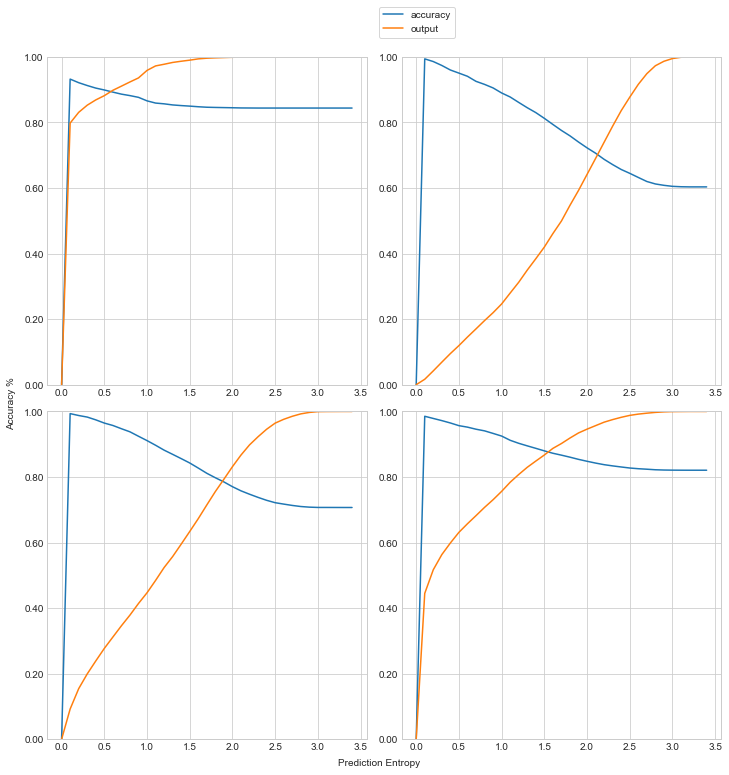

In [161]:
y = avgConfidence(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","Branch 1","Branch 2","Branch 3"],avgAcc=True,graph=True)



In [165]:
thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","Branch 1","Branch 2","Branch 3"],avgAcc= True)
# for i in thresholdpoints:
#     thresh = pd.DataFrame.from_dict(thresholdpoints[i],orient='index')

correct answers 8439
passed results 10000
correct [863, 933, 774, 679, 818, 772, 904, 886, 919, 891]
count [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
percentage [0.863, 0.933, 0.774, 0.679, 0.818, 0.772, 0.904, 0.886, 0.919, 0.891]
accuracy Value: {0: 0.863, 1: 0.933, 2: 0.774, 3: 0.679, 4: 0.818, 5: 0.772, 6: 0.904, 7: 0.886, 8: 0.919, 9: 0.891}
accuracy Value: [0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439 0.8439]


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.863 at 87 with 1000 counts 
nearest value to 0.8439 is 0.933 at 25 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8437869822485207 at 1863 with 845 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84375 at 69 with 512 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.843322818086225 at 3459 with 951 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.844059405940594 at 6178 with 808 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.904 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.886 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.918918918918919 at 735 with 999 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.891 at 25 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8441558441558441 at 6294 with 385 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8436018957345972 at 467 with 844 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8 at 92 with 5 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.514018691588785 at 0 with 107 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8333333333333334 at 107 with 6 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84251968503937 at 89 with 127 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8433048433048433 at 199 with 702 counts 
nearest value to 0.8439 is 0.8431952662721893 at 191 with 676 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439620081411127 at 1762 with 737 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8431818181818181 at 3792 with 440 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8438880706921944 at 714 with 679 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.848 at 526 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84 at 1130 with 75 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.84375 at 152 with 64 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8440366972477065 at 113 with 109 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8412698412698413 at 258 with 252 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.849 at 2671 with 1000 counts 
nearest value to 0.8439 is 0.8436724565756824 at 1626 with 806 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8431163287086446 at 153 with 937 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439241917502787 at 3497 with 897 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.856 at 2868 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.895 at 87 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8432642487046632 at 1887 with 772 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8438356164383561 at 611 with 365 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.843680709534368 at 2186 with 902 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8439620081411127 at 640 with 737 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.8748748748748749 at 459 with 999 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.854 at 2868 with 1000 counts 


C:\Users\GriffithInnovate\Anaconda3\envs\py36torch\lib\site-packages\ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.8439 is 0.898 at 2868 with 1000 counts 
nearest value to 0.8439 is 0.886 at 3496 with 1000 counts 


In [ ]:
y = predict(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","Branch 1","Branch 2","Branch 3"],avgAcc=True,graph=False)